## Leer los datos

In [162]:
import pandas as pd

data = pd.read_csv('simulacion.csv')

data.head()

,Lap,Elapsed Time,Lap Time,Minutes
0,100,45:03.9,01:31.0,1.500
1,99,43:32.9,01:08.3,1.133
2,98,42:24.6,00:16.5,0.267
3,97,42:08.1,02:13.1,2.217
4,96,39:55.0,02:33.5,2.550


## Histograma

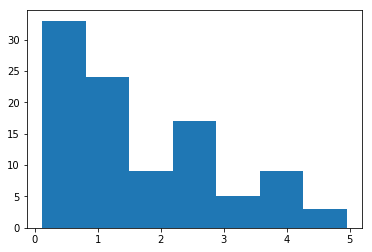

In [163]:
import matplotlib.pyplot as plt

freq, bins, _ = plt.hist(data['Minutes'], bins=7)

## Media muestral

In [164]:
data['Minutes'].mean()

1.6430300000000009

## Intervalos

In [165]:
tabla = pd.DataFrame()

intervalos = []

for i in range(1, 8):
    int = '{0: > .3f} - {1: > .3f}'.format(bins[i-1], bins[i])
    intervalos.append(int)
    
tabla['Intervalos de llegada'] = intervalos
tabla

,Intervalos de llegada
0,0.117 - 0.807
1,0.807 - 1.498
2,1.498 - 2.188
3,2.188 - 2.879
4,2.879 - 3.569
5,3.569 - 4.260
6,4.260 - 4.950


## Frecuencia observada

In [166]:
tabla['Frecuencia observada'] = freq
tabla

,Intervalos de llegada,Frecuencia observada
0,0.117 - 0.807,33.0
1,0.807 - 1.498,24.0
2,1.498 - 2.188,9.0
3,2.188 - 2.879,17.0
4,2.879 - 3.569,5.0
5,3.569 - 4.260,9.0
6,4.260 - 4.950,3.0


## Probabilidad de ocurrencia

In [167]:
from scipy.stats import expon

probs = []
for i in range(1,7):
    cdf = round(expon.cdf(bins[i]) - expon.cdf(bins[i-1]), 4)
    probs.append(cdf)
    
probs.append(1-sum(probs))

tabla['Probabilidad de ocurrencia'] = probs
tabla

,Intervalos de llegada,Frecuencia observada,Probabilidad de ocurrencia
0,0.117 - 0.807,33.0,0.4436
1,0.807 - 1.498,24.0,0.2224
2,1.498 - 2.188,9.0,0.1115
3,2.188 - 2.879,17.0,0.0559
4,2.879 - 3.569,5.0,0.0280
5,3.569 - 4.260,9.0,0.0141
6,4.260 - 4.950,3.0,0.1245


## Frecuencia esperada

In [168]:
tabla['Frecuencia esperada'] = [round(100*p, 4) for p in probs]
tabla['Agrupada (>=5)'] = ''
tabla 

,Intervalos de llegada,Frecuencia observada,Probabilidad de ocurrencia,Frecuencia esperada,Agrupada (>=5)
0,0.117 - 0.807,33.0,0.4436,44.36,
1,0.807 - 1.498,24.0,0.2224,22.24,
2,1.498 - 2.188,9.0,0.1115,11.15,
3,2.188 - 2.879,17.0,0.0559,5.59,
4,2.879 - 3.569,5.0,0.0280,2.80,
5,3.569 - 4.260,9.0,0.0141,1.41,
6,4.260 - 4.950,3.0,0.1245,12.45,


## Agrupación (>=5)

In [169]:
tabla.loc[5, 'Agrupada (>=5)'] = sum(tabla['Frecuencia esperada'][[3, 4, 5]])
tabla

,Intervalos de llegada,Frecuencia observada,Probabilidad de ocurrencia,Frecuencia esperada,Agrupada (>=5)
0,0.117 - 0.807,33.0,0.4436,44.36,
1,0.807 - 1.498,24.0,0.2224,22.24,
2,1.498 - 2.188,9.0,0.1115,11.15,
3,2.188 - 2.879,17.0,0.0559,5.59,
4,2.879 - 3.569,5.0,0.0280,2.80,
5,3.569 - 4.260,9.0,0.0141,1.41,9.8
6,4.260 - 4.950,3.0,0.1245,12.45,


## Chi cuadrada calculada

In [170]:
o = list(tabla['Frecuencia observada'][[0,1,2]])
o.append(sum(tabla['Frecuencia observada'][[3,4,5]]))
o.append(tabla['Frecuencia observada'][6])

e = list(tabla['Frecuencia esperada'][[0,1,2]])
e.append(tabla['Agrupada (>=5)'][5])
e.append(tabla['Frecuencia esperada'][6])

chi = []
for i in range(0,5):
    chi.append(((o[i] - e[i])**2)/e[i])

chi_calculada = sum(chi)
chi.insert(3, '')
chi.insert(4, '')
tabla['Chi cuadrada'] = chi

tabla

,Intervalos de llegada,Frecuencia observada,Probabilidad de ocurrencia,Frecuencia esperada,Agrupada (>=5),Chi cuadrada
0,0.117 - 0.807,33.0,0.4436,44.36,,2.90914
1,0.807 - 1.498,24.0,0.2224,22.24,,0.139281
2,1.498 - 2.188,9.0,0.1115,11.15,,0.414574
3,2.188 - 2.879,17.0,0.0559,5.59,,
4,2.879 - 3.569,5.0,0.0280,2.80,,
5,3.569 - 4.260,9.0,0.0141,1.41,9.8,45.8612
6,4.260 - 4.950,3.0,0.1245,12.45,,7.17289


In [171]:
chi_calculada

56.497113995039506

## Chi cuadrada inversa

In [172]:
from scipy.stats import chi2

chi2.isf(.05, 3)

7.8147279032511783